In [1]:
import quandl
quandl.ApiConfig.api_key = "nUqyP3u7T-rY9U8sL92P"
import numpy as np
import pandas as pd

In [2]:
prices = quandl.get(["NASDAQOMX/NQDMXUS.1", "NASDAQOMX/NDX.1", "NASDAQOMX/QGREEN.1"])
prices.head()

,NASDAQOMX/NQDMXUS - Index Value,NASDAQOMX/NDX - Index Value,NASDAQOMX/QGREEN - Index Value
Trade Date,,,
2001-03-30,737.93,NaN,NaN
2001-04-02,732.70,NaN,NaN
2001-04-03,722.45,NaN,NaN
2001-04-04,733.95,NaN,NaN
2001-04-05,745.27,NaN,NaN


In [3]:
cov_matrix = prices.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,NASDAQOMX/NQDMXUS - Index Value,NASDAQOMX/NDX - Index Value,NASDAQOMX/QGREEN - Index Value
NASDAQOMX/NQDMXUS - Index Value,0.000116,0.000062,0.000064
NASDAQOMX/NDX - Index Value,0.000062,0.000181,0.000079
NASDAQOMX/QGREEN - Index Value,0.000064,0.000079,0.000083


In [4]:
e_r = prices.resample('Y').last().pct_change().mean()
e_r

NASDAQOMX/NQDMXUS - Index Value    0.056230
NASDAQOMX/NDX - Index Value        0.133005
NASDAQOMX/QGREEN - Index Value     0.069599
dtype: float64

In [5]:
sd = prices.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
sd

NASDAQOMX/NQDMXUS - Index Value    0.170283
NASDAQOMX/NDX - Index Value        0.212700
NASDAQOMX/QGREEN - Index Value     0.144228
dtype: float64

In [6]:
assets = pd.concat([e_r, sd], axis=1)
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
NASDAQOMX/NQDMXUS - Index Value,0.056230,0.170283
NASDAQOMX/NDX - Index Value,0.133005,0.212700
NASDAQOMX/QGREEN - Index Value,0.069599,0.144228


In [7]:
p_ret = []
p_vol = []
p_weights = []

num_assets = len(prices.columns)
num_portfolios = 1000

In [8]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, e_r)
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    sd = np.sqrt(var)
    ann_sd = sd*np.sqrt(250)
    p_vol.append(ann_sd)

In [9]:
data = {'Returns':p_ret, 'Volatility':p_vol}

In [10]:
for counter, symbol in enumerate(prices.columns.tolist()):
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [11]:
portfolios = pd.DataFrame(data)
portfolios.head()

,Returns,Volatility,NASDAQOMX/NQDMXUS - Index Value weight,NASDAQOMX/NDX - Index Value weight,NASDAQOMX/QGREEN - Index Value weight
0,0.082257,0.156041,0.631225,0.332720,0.036055
1,0.084626,0.151423,0.488960,0.340087,0.170953
2,0.088569,0.150251,0.332552,0.369298,0.298150
3,0.089176,0.151231,0.349871,0.382530,0.267598
4,0.096471,0.156664,0.213274,0.468781,0.317944


In [12]:
portfolios.plot.scatter(x='Volatility', y='Returns', grid=True)

# Global Minimum Variance Portfolio

In [13]:
portfolios[portfolios['Volatility']==portfolios['Volatility'].min()]

,Returns,Volatility,NASDAQOMX/NQDMXUS - Index Value weight,NASDAQOMX/NDX - Index Value weight,NASDAQOMX/QGREEN - Index Value weight
901,0.068143,0.139456,0.262342,0.032352,0.705307


In [14]:
min_var_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
min_var_port

Returns                                   0.068143
Volatility                                0.139456
NASDAQOMX/NQDMXUS - Index Value weight    0.262342
NASDAQOMX/NDX - Index Value weight        0.032352
NASDAQOMX/QGREEN - Index Value weight     0.705307
Name: 901, dtype: float64

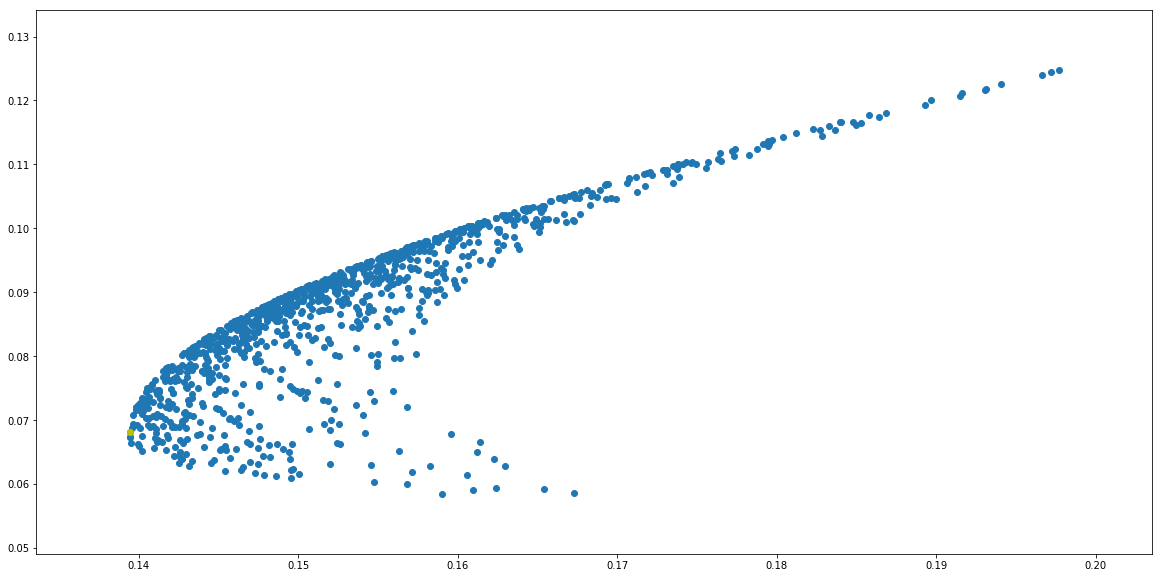

In [15]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'])
plt.scatter(min_var_port[1], min_var_port[0], color='y')

# Optimal Risky Portfolio

$$Sharpe Ratio = \frac{E(R_i)-rf}{\sigma_i}$$

In [16]:
rf = 0.025

In [17]:
((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()

888

In [18]:
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns                                   0.124737
Volatility                                0.197689
NASDAQOMX/NQDMXUS - Index Value weight    0.023257
NASDAQOMX/NDX - Index Value weight        0.874504
NASDAQOMX/QGREEN - Index Value weight     0.102240
Name: 888, dtype: float64

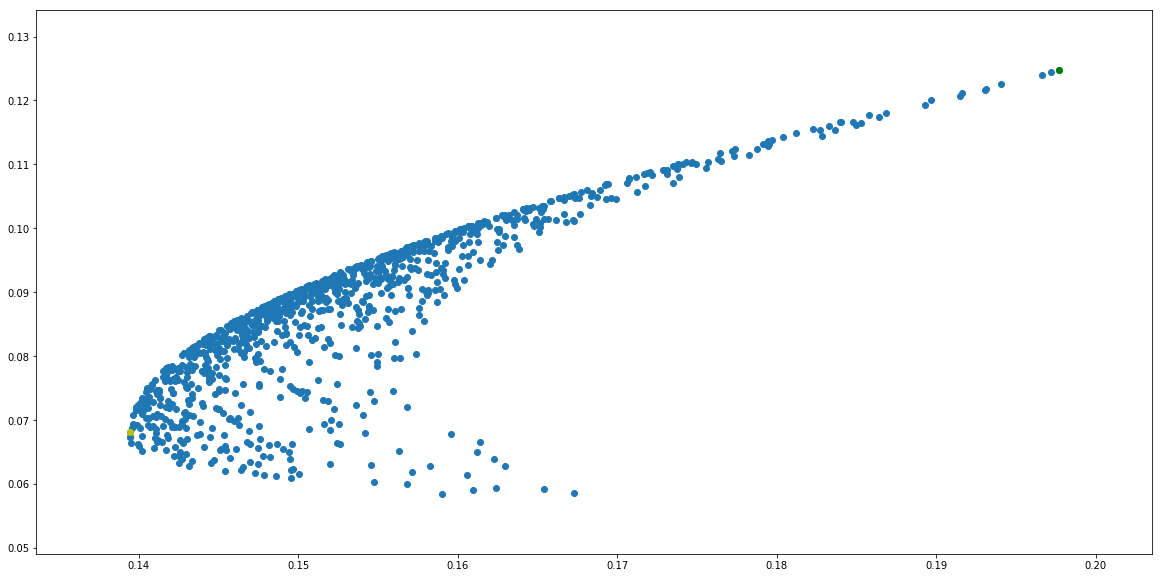

In [19]:
plt.subplots(figsize=(20,10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'])
plt.scatter(min_var_port[1], min_var_port[0], color='y')
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g')

# Utility Function

$$U = E(R)-0.5A\sigma^2$$

# Capital Allocation Line

$$E(R_P) = rf + \frac{E(R_i)-rf}{\sigma_i}\sigma_p$$

In [39]:
cal_x = []
cal_y = []
utility = []
a = 10

In [40]:
for er in np.linspace(rf, max(p_ret), 20):
    sd = (er - rf)/((optimal_risky_port[0]-rf)/optimal_risky_port[1])
    u = er - .5*a*(sd**2)
    cal_x.append(sd)
    cal_y.append(er)
    utility.append(u)

In [41]:
data2 = {'utility':utility, 'cal_y':cal_y, 'cal_x':cal_x}
cal = pd.DataFrame(data2)
cal.head()

,utility,cal_y,cal_x
0,0.025000,0.025000,0.000000
1,0.029708,0.030249,0.010405
2,0.033333,0.035499,0.020809
3,0.035876,0.040748,0.031214
4,0.037337,0.045997,0.041619


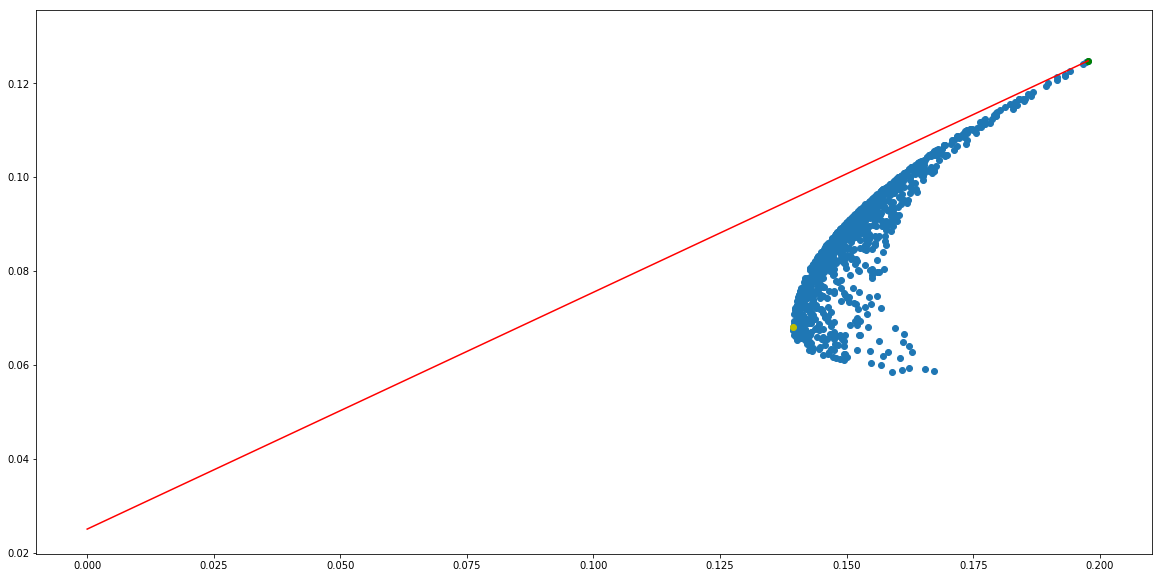

In [42]:
plt.subplots(figsize=(20,10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'])
plt.scatter(min_var_port[1], min_var_port[0], color='y')
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g')
plt.plot(cal_x, cal_y, color='r')

# Investor's Optimal Portfolio

In [46]:
cal['utility'].idxmax()

5

In [47]:
investors_port = cal.iloc[cal['utility'].idxmax()]
investors_port

utility    0.037714
cal_y      0.051247
cal_x      0.052023
Name: 5, dtype: float64

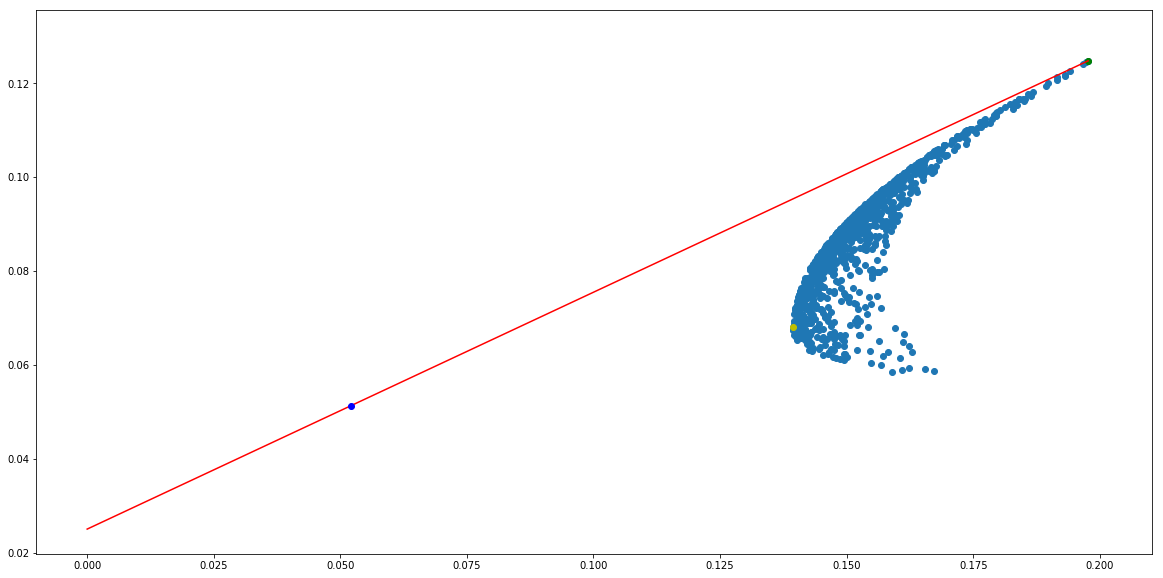

In [48]:
plt.subplots(figsize=(20,10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'])
plt.scatter(min_var_port[1], min_var_port[0], color='y')
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g')
plt.plot(cal_x, cal_y, color='r')
plt.plot(investors_port[2], investors_port[1], 'o', color='b')